In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [2]:
data_dir = "./dataset_blood_group"
img_size = (128, 128)
batch_size = 32

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='training')
val_gen = train_datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='validation')

Found 4790 images belonging to 8 classes.
Found 1194 images belonging to 8 classes.


In [8]:
# Define the CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_gen.class_indices), activation='softmax')
])


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Callbacks to improve training
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [11]:
# Train the model
history = model.fit(train_gen, validation_data=val_gen, epochs=30, callbacks=[reduce_lr, early_stopping])

Epoch 1/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 48s 304ms/step - accuracy: 0.2686 - loss: 1.9258 - val_accuracy: 0.7420 - val_loss: 0.6879 - learning_rate: 0.0010
Epoch 2/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 44s 291ms/step - accuracy: 0.7160 - loss: 0.7888 - val_accuracy: 0.8392 - val_loss: 0.5081 - learning_rate: 0.0010
Epoch 3/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 50s 332ms/step - accuracy: 0.7727 - loss: 0.6241 - val_accuracy: 0.8275 - val_loss: 0.4804 - learning_rate: 0.0010
Epoch 4/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 46s 303ms/step - accuracy: 0.7946 - loss: 0.5507 - val_accuracy: 0.8693 - val_loss: 0.3626 - learning_rate: 0.0010
Epoch 5/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 95s 390ms/step - accuracy: 0.8232 - loss: 0.4703 - val_accuracy: 0.8626 - val_loss: 0.3303 - learning_rate: 0.0010
Epoch 6/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 41s 273ms/step - accuracy: 0.8337 - loss: 0.4480 - val_accuracy: 0.8769 - val_loss: 0.3156 - learning_rate: 0.0010
Epoch 7/30
150/150 ━━━━━━━━━━━━━━━━━━━━ 46s 306ms/step - accuracy: 0.8

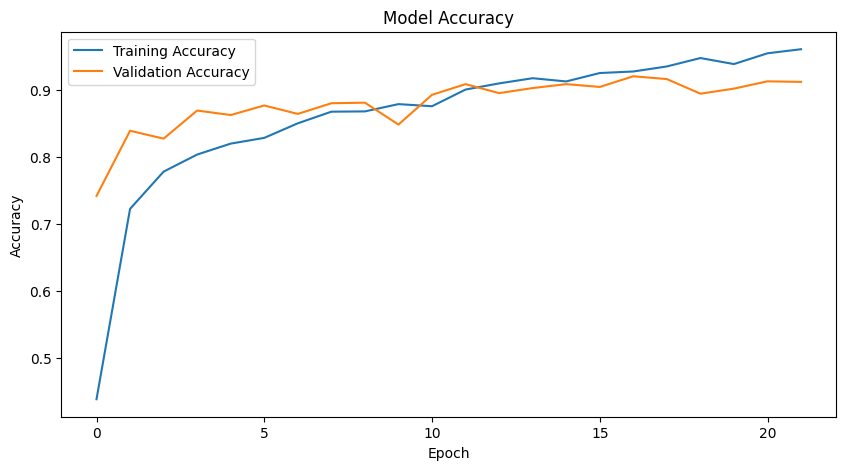

In [12]:
# Plot Training and Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

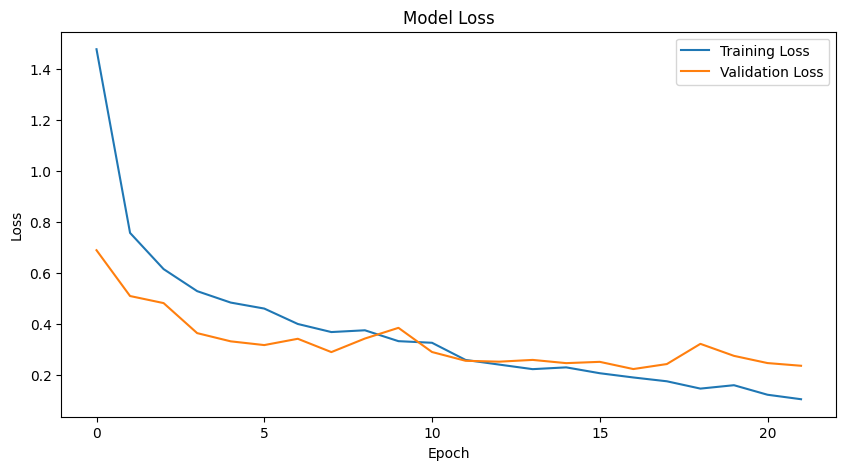

In [13]:
# Plot Training and Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
# Evaluate the model
y_true = []
y_pred = []

for i in range(len(val_gen)):
    images, labels = val_gen[i]
    preds = model.predict(images)
    y_true.extend(np.argmax(labels, axis=1))
    y_pred.extend(np.argmax(preds, axis=1))

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1

In [15]:
# Classification report
print(classification_report(y_true, y_pred, target_names=list(train_gen.class_indices.keys())))

              precision    recall  f1-score   support

          A+       0.94      0.92      0.93       112
          A-       0.94      0.89      0.91       201
         AB+       0.92      0.92      0.92       141
         AB-       0.93      0.94      0.93       151
          B+       0.93      0.94      0.93       130
          B-       0.93      0.95      0.94       147
          O+       0.89      0.92      0.90       170
          O-       0.89      0.90      0.90       142

    accuracy                           0.92      1194
   macro avg       0.92      0.92      0.92      1194
weighted avg       0.92      0.92      0.92      1194



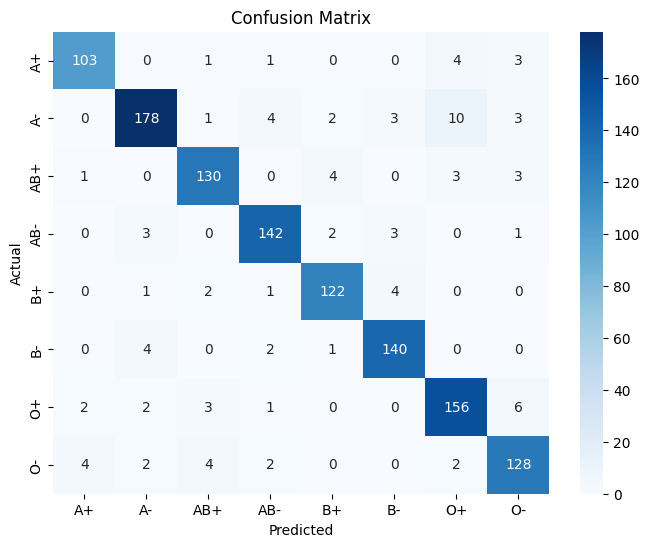

In [16]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_gen.class_indices.keys(), yticklabels=train_gen.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [17]:
model.save("training1.h5")